## **London Weather Prediction**

#### **Dataset Explanation**

##### Context
The dataset below was created by reconciling measurements from individual weather attribute requests provided by the European Climate Assessment (ECA). These measurements were recorded by a weather station near Heathrow Airport in London, UK.

This weather dataset pairs well with the **London Energy Dataset**. By joining both datasets on the `date` attribute (after preprocessing), you can perform interesting analyses on how weather impacts energy consumption in London.

##### Content
The dataset, **london_weather.csv**, contains **15,341 observations** and **10 attributes**. Below is a description of each attribute:

- **`date`**: Recorded date of measurement (int)
- **`cloud_cover`**: Cloud cover measurement in oktas (float)
- **`sunshine`**: Sunshine measurement in hours (hrs) (float)
- **`global_radiation`**: Irradiance measurement in Watt per square meter (W/m²) (float)
- **`max_temp`**: Maximum temperature recorded in degrees Celsius (°C) (float)
- **`mean_temp`**: Mean temperature in degrees Celsius (°C) (float)
- **`min_temp`**: Minimum temperature recorded in degrees Celsius (°C) (float)
- **`precipitation`**: Precipitation measurement in millimeters (mm) (float)
- **`pressure`**: Pressure measurement in Pascals (Pa) (float)
- **`snow_depth`**: Snow depth measurement in centimeters (cm) (float)

##### Source
[Weather Data on Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data/data)

---

#### **Prediction**

Prediction is performed using **Linear Regression**.


In [94]:
# Import Statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from  xgboost import XGBRegressor

In [95]:
# Load Dataset
df=pd.read_csv("london_weather.csv")
df = df.drop(columns=['date'])
df.head

<bound method NDFrame.head of        cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  \
0              2.0       7.0              52.0       2.3       -4.1      -7.5   
1              6.0       1.7              27.0       1.6       -2.6      -7.5   
2              5.0       0.0              13.0       1.3       -2.8      -7.2   
3              8.0       0.0              13.0      -0.3       -2.6      -6.5   
4              6.0       2.0              29.0       5.6       -0.8      -1.4   
...            ...       ...               ...       ...        ...       ...   
15336          1.0       0.9              32.0       7.5        7.5       7.6   
15337          7.0       3.7              38.0       3.6        1.1      -1.3   
15338          7.0       0.0              21.0       4.1        2.6       1.1   
15339          6.0       0.4              22.0       5.6        2.7      -0.1   
15340          7.0       1.3              34.0       1.5       -0.8      -3.1  

In [96]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [98]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [99]:
# Check Null Values
df.isna().sum()

cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [100]:
# Remove Null with Mean of Each Columns
df["cloud_cover"]=df["cloud_cover"].fillna(df["cloud_cover"].mean())
df["global_radiation"]=df["global_radiation"].fillna(df["global_radiation"].mean())
df["max_temp"]=df["max_temp"].fillna(df["max_temp"].mean())
df["mean_temp"]=df["mean_temp"].fillna(df["mean_temp"].mean())
df["min_temp"]=df["min_temp"].fillna(df["min_temp"].mean())
df["precipitation"]=df["precipitation"].fillna(df["precipitation"].mean())
df["snow_depth"]=df["snow_depth"].fillna(df["snow_depth"].mean())
df["pressure"]=df["pressure"].fillna(df["pressure"].mean())

In [101]:
# Rechecking Null Values
df.isna().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

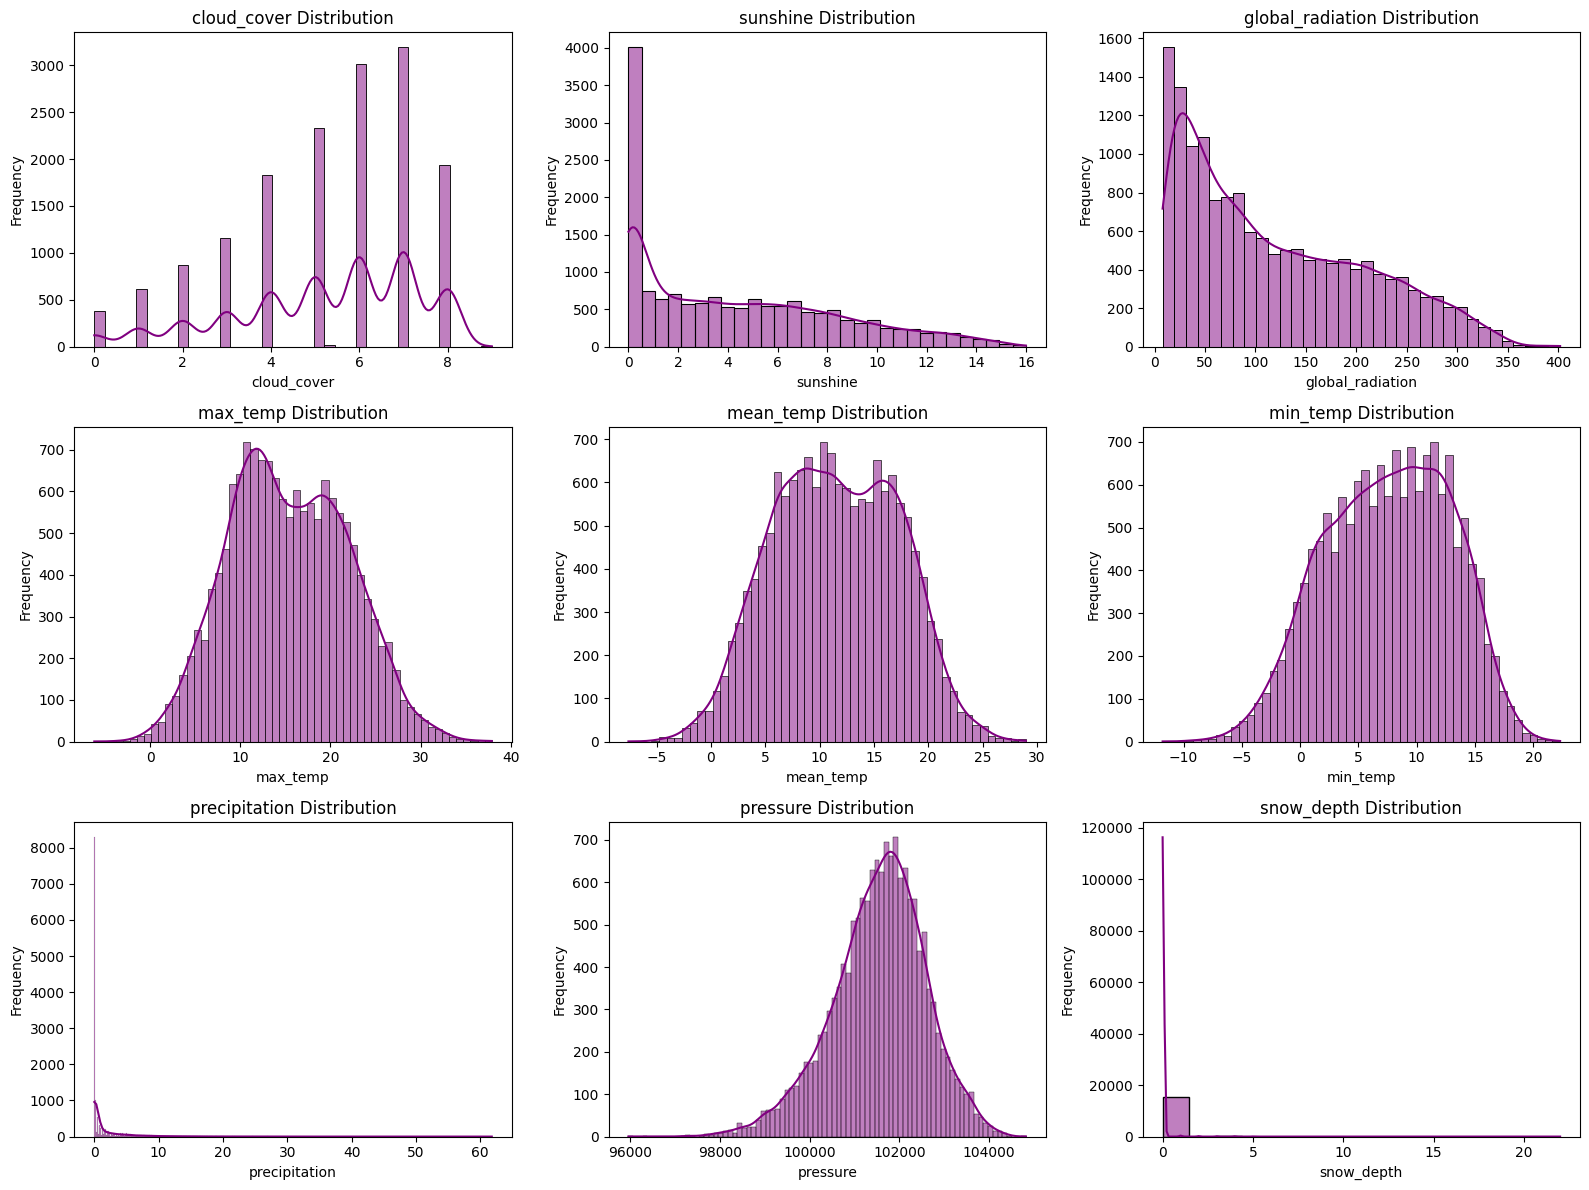

In [140]:
# Frequency Distributions

plt.figure(figsize=(16,12))

# Loop through each column to create histogram for each one
for i, column in enumerate(df.columns):
    if column != 'date':  # Skip 'date' column
        plt.subplot(3, 3, i+1)  # Adjust rows and columns for grid layout
        sns.histplot(df[column], color="purple", kde=True)  # kde=True adds a kernel density estimate
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')

# Menampilkan plot
plt.tight_layout()
plt.show()


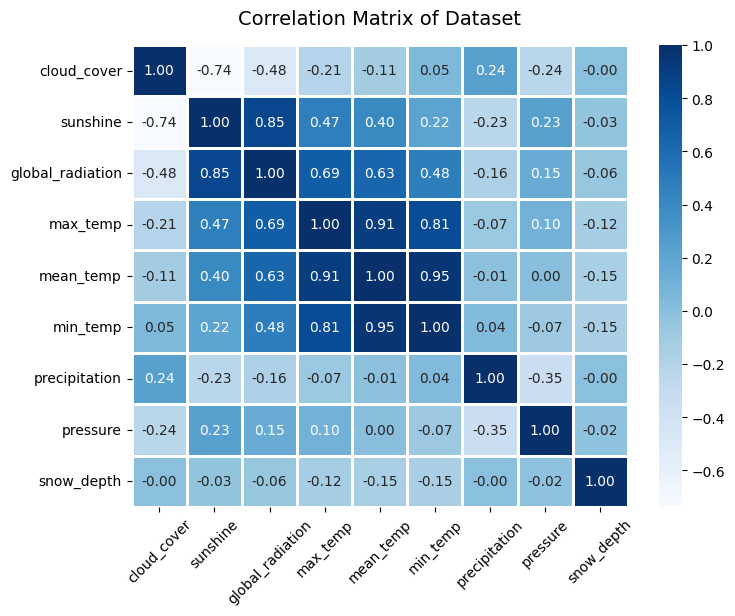

In [137]:
# Correlation Matrix
plt.figure(figsize=(8,6))

# Heatmap with correlation matrix
cm = df.corr()
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", linewidths=1)
plt.title("Correlation Matrix of Dataset", fontsize=14, pad=15)
plt.xticks(rotation=45)

# Plot
plt.show()


In [121]:
# Splitting X feature and y target
X=df.drop(columns=['precipitation', 'snow_depth'], axis=1)
y=df["pressure"]

In [122]:
# Splitting train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [106]:
X_train.shape

(12272, 6)

In [107]:
X_test.shape

(3069, 6)

In [123]:
# Model Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [124]:
# R2 Score 
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 1.0


In [126]:
# Random Forest Regression
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [127]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9999985018772596


In [129]:
# Using XGBOOST
model3 =XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=10, learning_rate=0.1)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [130]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9995092641485569


In [131]:
# Melakukan prediksi pada data training
y_train_pred = model.predict(X_train)

print("Data Training Prediction")

# Mean Squared Error (MSE) pada data training
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error (Train):', round(mse_train, 4))

# Root Mean Squared Error (RMSE) pada data training
rmse_train = sqrt(mse_train)
print('Root Mean Squared Error (Train):', round(rmse_train, 4))

# R^2 pada data training
r2_train = model.score(X_train, y_train)
print('R² (Train):', round(r2_train, 4))

Data Training Prediction
Mean Squared Error (Train): 8.7659
Root Mean Squared Error (Train): 2.9607
R² (Train): 1.0


In [132]:
# Melakukan prediksi pada data testing
y_test_pred = model.predict(X_test)

print("Data Testing Prediction")

# Mean Squared Error (MSE) pada data testing
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Test):', round(mse_test, 4))

# Root Mean Squared Error (RMSE) pada data testing
rmse_test = sqrt(mse_test)
print('Root Mean Squared Error (Test):', round(rmse_test, 4))

# R² pada data testing
r2_test = model.score(X_test, y_test)
print('R² (Test):', round(r2_test, 4))

Data Testing Prediction
Mean Squared Error (Test): 1.6394
Root Mean Squared Error (Test): 1.2804
R² (Test): 1.0


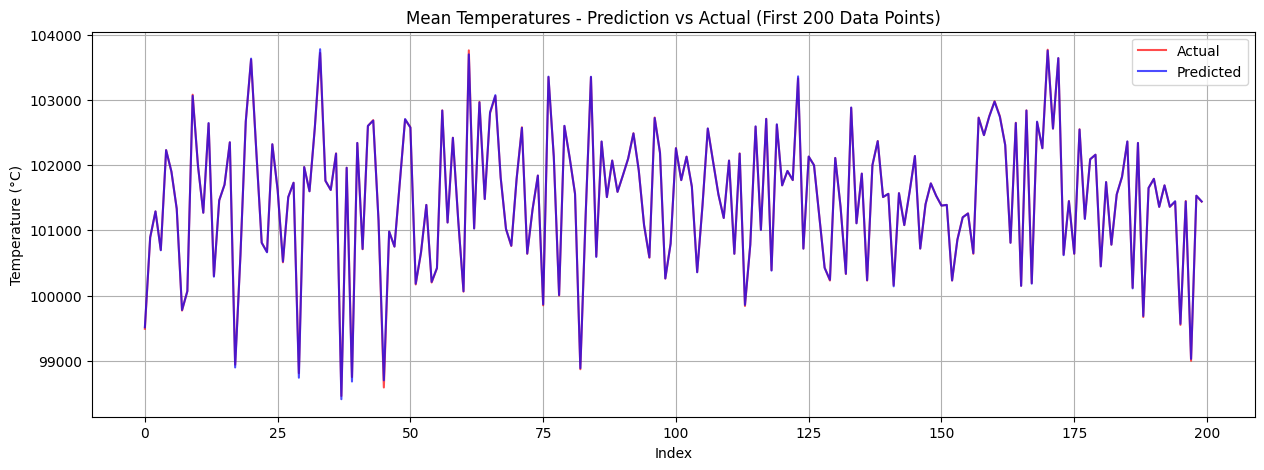

In [133]:
# Prediction Visualization
plt.figure(figsize=(15,5))

plt.plot(range(len(y_test[:200])), y_test[:200], label='Actual', color='red', alpha = 0.7)
plt.plot(range(len(y_pred[:200])), y_pred[:200], label='Predicted', color='blue', alpha = 0.7)

plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.title('Mean Temperatures - Prediction vs Actual (First 200 Data Points)')
plt.legend()
plt.grid(True)
plt.show()


## Additional Code

#### Checking Skewness of the Columns

Skewness Threshold
- Normal/Acceptable Skewness: Skewness between -0.5 to 0.5 is considered quite normal.
- Moderate Skewness: Skewness between -1 to -0.5 or 0.5 to 1. These columns can still be used, but you should check if they affect the model.
- High Skewness: Skewness outside the range of -1 to 1. This data may require transformation for the model to work better.

In [117]:
# Menghitung skewness untuk semua kolom numerik
skew_values = df.apply(skew)
print(skew_values)

# Menentukan kolom dengan skewness rendah
threshold = 0.5  # Atur threshold skewness (misalnya, antara -0.5 hingga 0.5 dianggap "normal")
low_skew_columns = skew_values[abs(skew_values) < threshold].index
print("Columns with low skewness:", low_skew_columns)

cloud_cover         -0.687200
sunshine             0.687304
global_radiation     0.658819
max_temp             0.125771
mean_temp           -0.013037
min_temp            -0.174681
precipitation        4.450020
pressure            -0.433139
snow_depth          23.726428
dtype: float64
Columns with low skewness: Index(['max_temp', 'mean_temp', 'min_temp', 'pressure'], dtype='object')


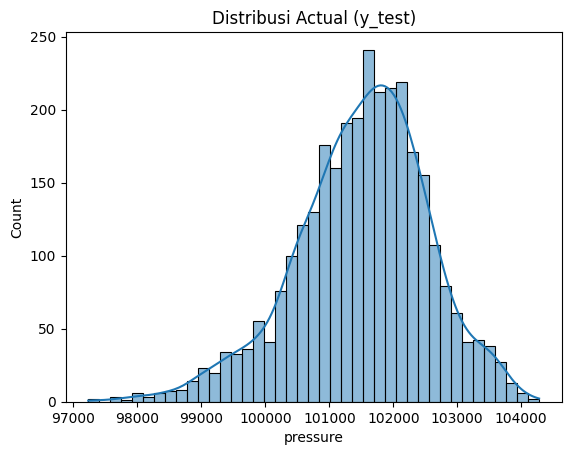

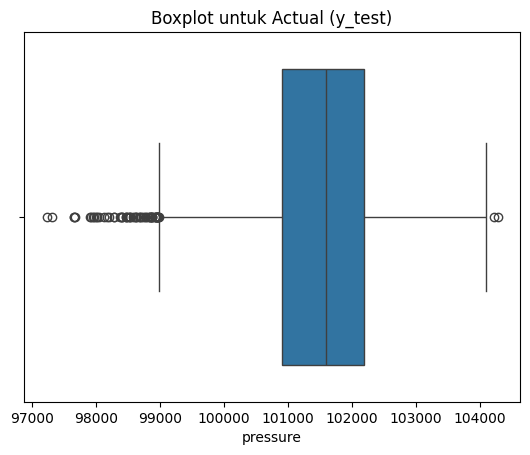

In [118]:
# Histogram untuk melihat distribusi y_test
sns.histplot(y_test, kde=True)
plt.title('Distribusi Actual (y_test)')
plt.show()

# Boxplot untuk mendeteksi outliers
sns.boxplot(x=y_test)
plt.title('Boxplot untuk Actual (y_test)')
plt.show()

In [119]:
# Drop the 'date' column from the dataframe
df_without_date = df.drop(columns=['date'])

# Create subplots: one for each column
num_cols = len(df_without_date.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, 3 * num_cols))

# Loop through each column and create a boxplot
for i, column in enumerate(df_without_date.columns):
    sns.boxplot(ax=axes[i], data=df_without_date, x=column)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


KeyError: "['date'] not found in axis"

In [25]:
# Mengecek apakah ada nilai NaN atau inf di y_test
print(y_test.isna().sum())  # Mengecek NaN
print(np.isinf(y_test).sum())  # Mengecek nilai infinite


0
0


In [26]:
# Cek apakah indeksnya terurut dengan benar
print(y_pred[:10])
print(y_test[:10])


[ 0.7361422   0.12231935 18.559967    5.5653133   1.0413939   0.44203374
  0.6048515   6.615173    1.0379344   7.525853  ]
13216    0.0
1923     0.0
15038    6.0
6903     0.0
4883     0.0
13189    0.0
14734    0.0
13007    0.4
3439     0.3
10107    0.0
Name: precipitation, dtype: float64


## 5 Feature Priority
1. Cloud Cover (cloud_cover):
Alasan: Awan adalah salah satu faktor utama yang mempengaruhi kemungkinan terjadinya hujan. Semakin banyak awan, semakin besar kemungkinan hujan terjadi. Cloud cover memberikan gambaran yang sangat jelas tentang potensi hujan.
Dasar Studi: Penelitian meteorologi menunjukkan bahwa adanya lebih banyak awan (terutama awan cumulonimbus) berhubungan langsung dengan peningkatan curah hujan. Awan membawa uap air yang dapat mengembun menjadi hujan.
Referensi: "Cloud cover and its effect on precipitation" dalam buku Meteorology: Understanding the Atmosphere (Ahrens, 2019).
2. Pressure (pressure):
Alasan: Tekanan atmosfer berperan besar dalam pembentukan awan dan curah hujan. Tekanan rendah biasanya terkait dengan cuaca buruk dan hujan, sedangkan tekanan tinggi terkait dengan cuaca cerah.
Dasar Studi: Penurunan tekanan atmosfer biasanya mengindikasikan pembentukan awan dan cuaca buruk, yang dapat memicu hujan. Pada daerah dengan tekanan rendah, udara naik dan mengarah pada kondensasi uap air yang menghasilkan hujan.
Referensi: Understanding Weather and Climate oleh Ahrens (2018), menjelaskan hubungan antara tekanan atmosfer dan curah hujan.
3. Max Temperature (max_temp):
Alasan: Suhu tinggi berkontribusi pada penguapan air yang lebih banyak, yang nantinya bisa terkondensasi menjadi awan dan kemudian turun sebagai hujan. Hujan yang disebabkan oleh suhu tinggi umumnya bersifat konvektif.
Dasar Studi: Suhu tinggi meningkatkan kelembapan udara dan proses kondensasi, yang dapat meningkatkan kemungkinan hujan.
Referensi: "Climatic Variables and Precipitation Patterns" dalam International Journal of Climatology (2016).
4. Sunshine (sunshine):
Alasan: Paparan sinar matahari yang lebih sedikit dapat mengindikasikan awan atau hujan yang mendekat. Dalam banyak kasus, hujan terjadi pada hari yang lebih mendung atau berawan, yang menghasilkan lebih sedikit sinar matahari.
Dasar Studi: Hubungan terbalik antara sinar matahari dan curah hujan telah ditemukan, di mana lebih sedikitnya sinar matahari dapat menunjukkan cuaca yang lebih mendung dan berpotensi hujan.
Referensi: Penelitian dalam Atmospheric Science Letters menunjukkan hubungan antara sinar matahari yang terbatas dan kemungkinan curah hujan yang tinggi.
5. Global Radiation (global_radiation):
Alasan: Radiasi matahari adalah indikator penting dari energi atmosfer yang berpotensi menyebabkan penguapan dan pembentukan awan. Penguapan yang lebih tinggi dapat meningkatkan kelembapan udara, yang pada gilirannya dapat meningkatkan kemungkinan curah hujan.
Dasar Studi: Peningkatan global radiation dapat meningkatkan penguapan dan pembentukan awan yang bisa menghasilkan hujan. Dalam banyak kasus, peningkatan radiasi juga berhubungan dengan peningkatan intensitas hujan.
Referensi: Solar Radiation and Its Effect on Precipitation dalam Weather and Forecasting (2007).